In [39]:
from osgeo import gdal
import os

import warnings
warnings.filterwarnings('ignore')
# import geoplot as gplt

import geopandas as gpd
# import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import laspy
import rasterio
from rasterio import mask
import folium
from shapely.geometry import box
from glob import glob
from shapely.geometry import Polygon
import rasterio



In [30]:
## Plot raster/tif image
# --------------------
def plot_raster(rast_data, title=''):
    """
    Plots raster tif image both in log scale(+1) and original verion
    """
    fig, (axlog, axorg) = plt.subplots(1, 2, figsize=(14,7))
    im1 = axlog.imshow(np.log1p(rast_data)) # vmin=0, vmax=2.1)
#     im2 = axorg.imshow(rast_data)

    plt.title("{}".format(title), fontdict = {'fontsize': 15})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)

In [31]:
# Read raster/tif file
# --------------------
iowa_tif = 'iowa.tif'
raster_iowa = rasterio.open(iowa_tif)
iowa_data = raster_iowa.read(1)

In [32]:
iowa_data

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

In [33]:
type(iowa_data)

numpy.ndarray

In [34]:
count = iowa_data[iowa_data > 0].sum()
count

623568522.8765813

In [35]:
iowa_data.shape

(1493, 1499)

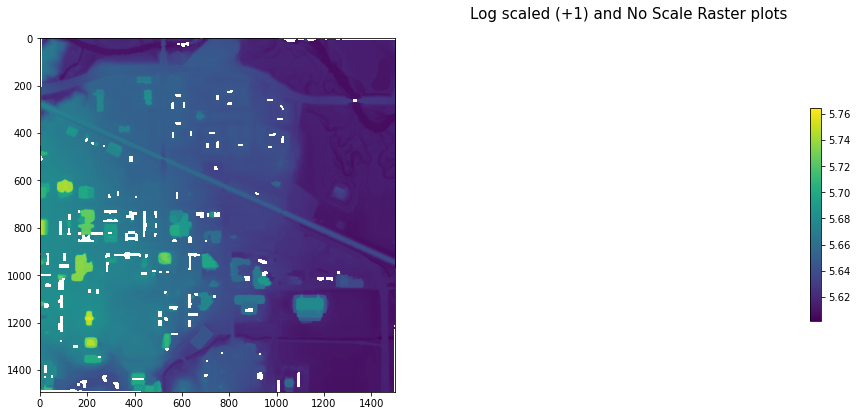

In [36]:
title = 'Log scaled (+1) and No Scale Raster plots'.format(count)
plot_raster(iowa_data, title)

In [38]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

grid = gpd.GeoDataFrame([polygon], columns=["geometry"])
grid.set_crs(epsg=4326, inplace=True)

,geometry
0,"POLYGON ((-93.75616 41.91801, -93.75616 41.921..."


In [40]:
band_id = 1  # this assumes you want the first band, change to match the band number you want

raster = rasterio.open('iowa.tif')
band_arr = raster.read(band_id)  # band_arr is a numpy array of shape (raster.width, raster.height)

In [42]:
px_vals = []

for x in range(band_arr.shape[0]):
    for y in range(band_arr.shape[1]):
        px_vals.append({'x': x, 
                        'y': y,
                        'value': band_arr[x, y]})
px_vals_df = pd.DataFrame.from_dict(px_vals)

In [43]:
px_vals_df.tail(20)

,x,y,value
2237987,1492,1479,271.927013
2237988,1492,1480,271.879395
2237989,1492,1481,271.826822
2237990,1492,1482,271.751332
2237991,1492,1483,271.714532
2237992,1492,1484,271.651478
2237993,1492,1485,271.614721
2237994,1492,1486,271.543255
2237995,1492,1487,271.522160
2237996,1492,1488,271.587008


In [4]:
filename='iowa'
inDs = gdal.Open('{}.tif'.format(filename))
outDs = gdal.Translate('{}.xyz'.format(filename), inDs, format='XYZ', creationOptions=["ADD_HEADER_LINE=YES"])
outDs = None
try:
    os.remove('{}.csv'.format(filename))
except OSError:
    pass
os.rename('{}.xyz'.format(filename), '{}.csv'.format(filename))
os.system('ogr2ogr -f "ESRI Shapefile" -oo X_POSSIBLE_NAMES=X* -oo Y_POSSIBLE_NAMES=Y* -oo KEEP_GEOM_COLUMNS=NO {0}.shp {0}.csv'.format(filename))

0

In [5]:
data=pd.read_csv('iowa.csv')
data.head()

,X Y Z
0,446112.890858721104 4654067.69273306057 -9999
1,446113.890858721104 4654067.69273306057 -9999
2,446114.890858721104 4654067.69273306057 -9999
3,446115.890858721104 4654067.69273306057 -9999
4,446116.890858721104 4654067.69273306057 280.56...


In [6]:
shps = glob('iowa.shp')
shps.sort()
shapefiles = []
for i in shps:
    usa_gdf = (gpd.GeoDataFrame.from_file(i))
    


In [27]:
usa_gdf.shape

(2238007, 2)

In [28]:
usa_gdf.head(20)

,Z,geometry
0,-9999,POINT (446112.891 4654067.693)
1,-9999,POINT (446113.891 4654067.693)
2,-9999,POINT (446114.891 4654067.693)
3,-9999,POINT (446115.891 4654067.693)
4,280.567413330078125,POINT (446116.891 4654067.693)
5,280.631103515625,POINT (446117.891 4654067.693)
6,280.623016357421875,POINT (446118.891 4654067.693)
7,280.53839111328125,POINT (446119.891 4654067.693)
8,280.42059326171875,POINT (446120.891 4654067.693)
9,280.277740478515625,POINT (446121.891 4654067.693)


In [29]:
usa_gdf.to_csv(r'geodataframe.csv')